<a href="https://colab.research.google.com/github/sambhavgsharma/MLSpecializationLabs/blob/main/sigmoid_function_and_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from matplotlib.widgets import Button

In [3]:
inp_array = np.array([1,2,3])
exp_array = np.exp(inp_array)
print(f"Input array: {inp_array}")
print(f"Exponential array: {exp_array}")

inp_val = 1
exp_val = np.exp(inp_val)
print(f"Input value: {inp_val}")
print(f"Exponential value: {exp_val}")


Input array: [1 2 3]
Exponential array: [ 2.71828183  7.3890561  20.08553692]
Input value: 1
Exponential value: 2.718281828459045


In [4]:
def sigmoid(z):
  g = 1/(1+np.exp(-z))
  return g

In [5]:
z_tmp = np.arange(-10,11)
y = sigmoid(z_tmp)

np.set_printoptions(precision=3)
print("Input (z), Output (sigmoid(z))")
print(np.c_[z_tmp, y])

Input (z), Output (sigmoid(z))
[[-1.000e+01  4.540e-05]
 [-9.000e+00  1.234e-04]
 [-8.000e+00  3.354e-04]
 [-7.000e+00  9.111e-04]
 [-6.000e+00  2.473e-03]
 [-5.000e+00  6.693e-03]
 [-4.000e+00  1.799e-02]
 [-3.000e+00  4.743e-02]
 [-2.000e+00  1.192e-01]
 [-1.000e+00  2.689e-01]
 [ 0.000e+00  5.000e-01]
 [ 1.000e+00  7.311e-01]
 [ 2.000e+00  8.808e-01]
 [ 3.000e+00  9.526e-01]
 [ 4.000e+00  9.820e-01]
 [ 5.000e+00  9.933e-01]
 [ 6.000e+00  9.975e-01]
 [ 7.000e+00  9.991e-01]
 [ 8.000e+00  9.997e-01]
 [ 9.000e+00  9.999e-01]
 [ 1.000e+01  1.000e+00]]


In [9]:
def draw_vthresh(ax, x_value, left_color='blue', right_color='red', alpha=0.1, line_color='k', line_style='--'):
  y_min, y_max = ax.get_ylim()
  ax.axvspan(ax.get_xlim()[0], x_value, color=left_color, alpha=alpha)
  ax.axvspan(x_value, ax.get_xlim()[1], color=right_color, alpha=alpha)
  ax.axvline(x=x_value, color=line_color, linestyle=line_style)


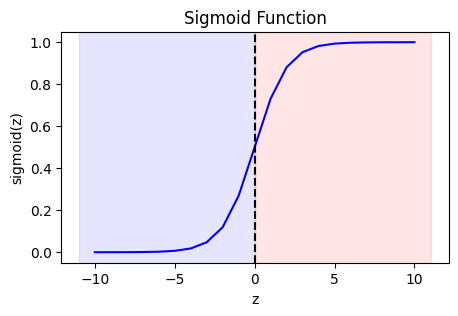

In [10]:
# Plotting z vs sigmoid(z)
fig, ax = plt.subplots(1,1, figsize=(5,3))
ax.plot(z_tmp, y, c='b')
ax.set_title("Sigmoid Function")
ax.set_ylabel("sigmoid(z)")
ax.set_xlabel('z')
draw_vthresh(ax,0)

In [12]:
# Logistic Regression
x_train = np.array([0., 1,2,3,4,5])
y_train = np.array([0,0,0,1,1,1])
w_in = np.zeros((1))
b_in = 0

In [17]:
plt.close('all')
def plt_one_addpt_onclick(x_train, y_train, w_in, b_in, logistic=True):
    # Store data
    points = [list(x_train.flatten()), list(y_train.flatten())]
    show_thresh = False
    model = None  # Will store fitted LogisticRegression model

    fig, ax = plt.subplots()
    plt.subplots_adjust(bottom=0.25)
    ax.set_xlim(0, 10)
    ax.set_ylim(-0.1, 1.1)
    ax.set_title("Example of Logistic Regression on Categorical Data")
    ax.set_xlabel("Tumor Size")
    ax.set_ylabel("y")

    benign_scatter = ax.scatter([], [], marker='o', edgecolor='blue', facecolor='none', s=100, label='benign')
    malignant_scatter = ax.scatter([], [], marker='x', color='red', s=100, label='malignant')

    line_plot, = ax.plot([], [], color='orange', lw=2)
    ax.legend()

    def update_plot():
        benign_x = [points[0][i] for i in range(len(points[0])) if points[1][i] == 0]
        benign_y = [0]*len(benign_x)
        malignant_x = [points[0][i] for i in range(len(points[0])) if points[1][i] == 1]
        malignant_y = [1]*len(malignant_x)
        benign_scatter.set_offsets(np.c_[benign_x, benign_y])
        malignant_scatter.set_offsets(np.c_[malignant_x, malignant_y])

        if logistic and model is not None:
            x_vals = np.linspace(0, 10, 200).reshape(-1, 1)
            y_vals = model.predict_proba(x_vals)[:, 1]
            line_plot.set_data(x_vals, y_vals)

        fig.canvas.draw_idle()

    def onclick(event):
        if event.inaxes != ax:
            return
        if event.button == 1:  # Left click = benign (0)
            points[0].append(event.xdata)
            points[1].append(0)
        elif event.button == 3:  # Right click = malignant (1)
            points[0].append(event.xdata)
            points[1].append(1)
        update_plot()

    def run_regression(event):
        nonlocal model
        X = np.array(points[0]).reshape(-1, 1)
        y = np.array(points[1])
        if len(np.unique(y)) < 2:
            print("Need both classes to run regression.")
            return
        model = LogisticRegression()
        model.fit(X, y)
        update_plot()

    def toggle_thresh(event):
        nonlocal show_thresh
        show_thresh = not show_thresh
        ax.collections = [benign_scatter, malignant_scatter]  # remove old fills

        if show_thresh and model is not None:
            # Find threshold crossing (0.5)
            x_vals = np.linspace(0, 10, 200).reshape(-1, 1)
            y_probs = model.predict_proba(x_vals)[:, 1]
            idx = np.argmin(np.abs(y_probs - 0.5))
            thresh_x = x_vals[idx, 0]

            ax.axvspan(ax.get_xlim()[0], thresh_x, color='blue', alpha=0.1)
            ax.axvspan(thresh_x, ax.get_xlim()[1], color='red', alpha=0.1)
            ax.axvline(thresh_x, color='k', linestyle='--')

        fig.canvas.draw_idle()

    # Buttons
    ax_run = plt.axes([0.1, 0.05, 0.35, 0.075])
    btn_run = Button(ax_run, "Run Logistic Regression (click)")
    btn_run.on_clicked(run_regression)

    ax_toggle = plt.axes([0.55, 0.05, 0.35, 0.075])
    btn_toggle = Button(ax_toggle, "Toggle 0.5 threshold (after regression)")
    btn_toggle.on_clicked(toggle_thresh)

    # Connect click event
    fig.canvas.mpl_connect('button_press_event', onclick)

    update_plot()
    plt.show()

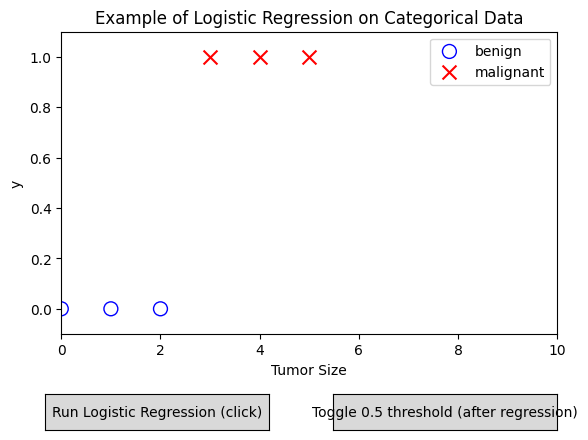

In [18]:
addpt = plt_one_addpt_onclick( x_train,y_train, w_in, b_in, logistic=True)
